In [1]:
%matplotlib notebook
"""
Esto de acá arriba permite que la notebook tenga gráficos interactivos
"""
import seaborn
import os
import glob
import mne

file_path = os.path.expanduser("~/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/")
files = glob.glob(os.path.join(file_path, "*.set"))

In [2]:
def event_id_func(x):
    return 1 if x == "0" else 2

filename = files[1]

In [3]:
help(mne.io.read_raw_eeglab)

Help on function read_raw_eeglab in module mne.io.eeglab.eeglab:

read_raw_eeglab(input_fname, montage=None, eog=(), event_id=None, event_id_func='strip_to_integer', preload=False, verbose=None, uint16_codec=None)
    Read an EEGLAB .set file.
    
    Parameters
    ----------
    input_fname : str
        Path to the .set file. If the data is stored in a separate .fdt file,
        it is expected to be in the same folder as the .set file.
    montage : str | None | instance of montage
        Path or instance of montage containing electrode positions.
        If None, sensor locations are (0,0,0). See the documentation of
        :func:`mne.channels.read_montage` for more information.
    eog : list | tuple | 'auto'
        Names or indices of channels that should be designated EOG channels.
        If 'auto', the channel names containing ``EOG`` or ``EYE`` are used.
        Defaults to empty tuple.
    event_id : dict | None
        The ids of the events to consider. If None (defaul

In [4]:
data_mne = mne.io.read_raw_eeglab(filename, event_id_func=event_id_func, preload=True)
data_mne.filter(1, 20)


Reading /home/jmperez/projects/corpora/P3Speller/P3Speller-old-y-datos/sets/PruebasMuseo_12521001.fdt
Reading 0 ... 69503  =      0.000 ...   542.992 secs...
Setting up band-pass filter from 1 - 20 Hz
l_trans_bandwidth chosen to be 1.0 Hz
h_trans_bandwidth chosen to be 5.0 Hz
Filter length of 845 samples (6.602 sec) selected


<RawEEGLAB  |  PruebasMuseo_12521001.fdt, n_channels x n_times : 15 x 69504 (543.0 sec), ~8.0 MB, data loaded>

<IPython.core.display.Javascript object>


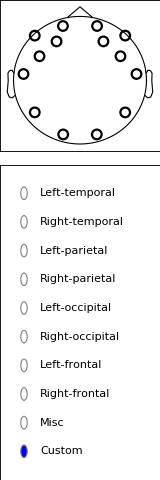

/home/jmperez/.pyenv/versions/3.5.1/envs/p300-jmp/lib/python3.5/site-packages/mne/viz/evoked.py:155: RuntimeWarning: invalid value encountered in true_divide
  rgb /= rgb.max(0)
/home/jmperez/.pyenv/versions/3.5.1/envs/p300-jmp/lib/python3.5/site-packages/matplotlib/colors.py:233: RuntimeWarning: invalid value encountered in less
  if np.any((result < 0) | (result > 1)):
/home/jmperez/.pyenv/versions/3.5.1/envs/p300-jmp/lib/python3.5/site-packages/matplotlib/colors.py:233: RuntimeWarning: invalid value encountered in greater
  if np.any((result < 0) | (result > 1)):


<IPython.core.display.Javascript object>


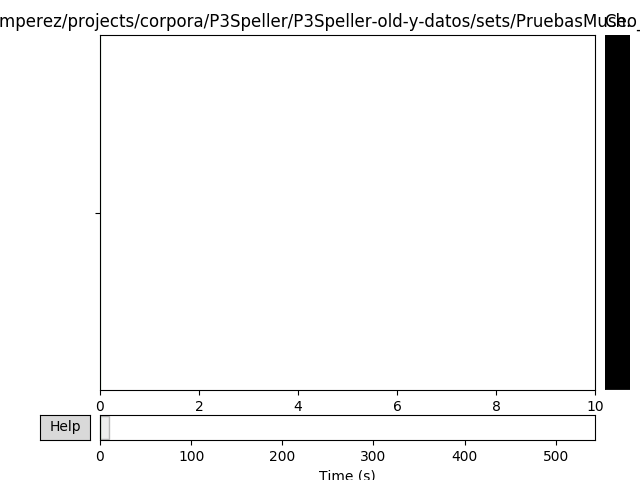

In [5]:
data_mne.plot(block=True, order='position');

In [6]:
data_mne.ch_names

['AF3',
 'F7',
 'F3',
 'FC5',
 'T7',
 'P7',
 'O1',
 'O2',
 'P8',
 'T8',
 'FC6',
 'F4',
 'F8',
 'AF4',
 'STI 014']

In [13]:
data_mne.info


<Info | 16 non-empty fields
    bads : 'list | 0 items
    buffer_size_sec : 'float | 1.0
    ch_names : 'list | AF3, F7, F3, FC5, T7, P7, O1, O2, P8, ...
    chs : 'list | 15 items (STIM: 1, EEG: 14)
    comps : 'list | 0 items
    custom_ref_applied : 'bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : 'list | 0 items
    highpass : 'float | 1.0 Hz
    hpi_meas : 'list | 0 items
    hpi_results : 'list | 0 items
    lowpass : 'float | 20.0 Hz
    meas_date : 'numpy.ndarray | 1969-12-31 21:00:00
    nchan : 'int | 15
    projs : 'list | 0 items
    sfreq : 'float | 128.0 Hz
    acq_pars : 'NoneType
    acq_stim : 'NoneType
    ctf_head_t : 'NoneType
    description : 'NoneType
    dev_ctf_t : 'NoneType
    dig : 'NoneType
    experimenter : 'NoneType
    file_id : 'NoneType
    hpi_subsystem : 'NoneType
    kit_system_id : 'NoneType
    line_freq : 'NoneType
    meas_id : 'NoneType
    proj_id : 'NoneType
    proj_name : 'NoneType
    subject_info : 'NoneTy

# Events

Let's see what `find_events` do

In [13]:
help(mne.find_events)

Help on function find_events in module mne.event:

find_events(raw, stim_channel=None, output='onset', consecutive='increasing', min_duration=0, shortest_event=2, mask=None, uint_cast=False, mask_type='not_and', verbose=None)
    Find events from raw file.
    
    Parameters
    ----------
    raw : Raw object
        The raw data.
    stim_channel : None | string | list of string
        Name of the stim channel or all the stim channels
        affected by the trigger. If None, the config variables
        'MNE_STIM_CHANNEL', 'MNE_STIM_CHANNEL_1', 'MNE_STIM_CHANNEL_2',
        etc. are read. If these are not found, it will fall back to
        'STI 014' if present, then fall back to the first channel of type
        'stim', if present.
    output : 'onset' | 'offset' | 'step'
        Whether to report when events start, when events end, or both.
    consecutive : bool | 'increasing'
        If True, consider instances where the value of the events
        channel changes without firs

```
    Returns
    -------
    events : array, shape = (n_events, 3)
        All events that were found. The first column contains the event time
        in samples and the third column contains the event id. For output =
        'onset' or 'step', the second column contains the value of the stim
        channel immediately before the event/step. For output = 'offset',
        the second column contains the value of the stim channel after the
        event offset.
```

In our case, it is onset, and I think it is always 0. Is it?

In [ ]:
events = mne.find_events(data_mne)

In [23]:
events

array([[  641,     0,     2],
       [  673,     0,     1],
       [  705,     0,     1],
       ..., 
       [69025,     0,     1],
       [69057,     0,     1],
       [69089,     0,     1]])